<a href="https://colab.research.google.com/github/VikramAchuthan/prosper/blob/main/prosper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
path = "/content/drive/MyDrive/Prosper/prosperLoanData.csv"
prosper_df = pd.read_csv(path, nrows=100000)

prosper_df.drop(prosper_df.columns.difference(['LoanStatus','ProsperRating (Alpha)','BorrowerState', 'Occupation', 'EmploymentStatus', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'RevolvingCreditBalance', 'BankcardUtilization', 'DebtToIncomeRatio','StatedMonthlyIncome',]), 1, inplace=True)
print(prosper_df['LoanStatus'].value_counts())
prosper_df['LoanStatus'] = prosper_df['LoanStatus'].replace('Completed',1)
prosper_df['LoanStatus'] = prosper_df['LoanStatus'].replace('Current',1)
prosper_df['LoanStatus'] = prosper_df['LoanStatus'].replace('Chargedoff',0)
prosper_df['LoanStatus'] = prosper_df['LoanStatus'].replace('Defaulted',0)
prosper_df['LoanStatus'] = prosper_df['LoanStatus'].replace('^P.+',0, regex = True)
prosper_df['LoanStatus'] = prosper_df['LoanStatus'].replace('FinalPaymentInProgress',1)
prosper_df['LoanStatus'] = prosper_df['LoanStatus'].replace('Cancelled',0)



label_data = prosper_df['LoanStatus']
prosper_df.drop('LoanStatus',axis = 1, inplace = True)
prosper_df.drop('ProsperRating (Alpha)',axis = 1, inplace = True)
prosper_df.drop('BorrowerState',axis = 1, inplace = True)
prosper_df.drop('Occupation',axis = 1, inplace = True)
prosper_df.drop('EmploymentStatus',axis = 1, inplace = True)
prosper_df.drop('FirstRecordedCreditLine',axis = 1, inplace = True)
prosper_df = prosper_df.fillna(0)

print(prosper_df.isna().sum().sum())








prosper_df.head(50)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


Current                   49737
Completed                 33383
Chargedoff                10498
Defaulted                  4380
Past Due (1-15 days)        719
Past Due (31-60 days)       317
Past Due (61-90 days)       270
Past Due (91-120 days)      263
Past Due (16-30 days)       233
FinalPaymentInProgress      181
Past Due (>120 days)         15
Cancelled                     4
Name: LoanStatus, dtype: int64
0


,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,RevolvingCreditBalance,BankcardUtilization,DebtToIncomeRatio,StatedMonthlyIncome
0,640.0,659.0,5.0,4.0,12.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.00,0.17,3083.333333
1,680.0,699.0,14.0,14.0,29.0,3.0,5.0,0.0,0.0,0.0,1.0,3989.0,0.21,0.18,6125.000000
2,480.0,499.0,0.0,0.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.00,0.06,2083.333333
3,800.0,819.0,5.0,5.0,29.0,0.0,1.0,4.0,10056.0,14.0,0.0,1444.0,0.04,0.15,2875.000000
4,680.0,699.0,19.0,19.0,49.0,1.0,9.0,0.0,0.0,0.0,0.0,6193.0,0.81,0.26,9583.333333
5,740.0,759.0,21.0,17.0,49.0,0.0,2.0,0.0,0.0,0.0,0.0,62999.0,0.39,0.36,8333.333333
6,680.0,699.0,10.0,7.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,5812.0,0.72,0.27,2083.333333
7,700.0,719.0,6.0,6.0,10.0,3.0,16.0,0.0,0.0,0.0,1.0,1260.0,0.13,0.24,3355.750000
8,820.0,839.0,17.0,16.0,32.0,1.0,6.0,0.0,0.0,0.0,0.0,9906.0,0.11,0.25,3333.333333
9,820.0,839.0,17.0,16.0,32.0,1.0,6.0,0.0,0.0,0.0,0.0,9906.0,0.11,0.25,3333.333333


In [3]:
from sklearn.model_selection import train_test_split

X = prosper_df
y = label_data


X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=0)



In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(class_weight='balanced', max_iter = 800)
log_model.fit(X_train, y_train)

# ss_train = StandardScaler()
# X_train = ss_train.fit(X_train)

# ss_test = StandardScaler()
# X_test = ss_test.fit(X_test)

LogisticRegression(class_weight='balanced', max_iter=800)

In [5]:
from sklearn.metrics import classification_report
predictions_log = log_model.predict(X_test)
print(classification_report(y_test, predictions_log))

              precision    recall  f1-score   support

           0       0.34      0.58      0.43      4137
           1       0.90      0.78      0.84     20863

    accuracy                           0.75     25000
   macro avg       0.62      0.68      0.63     25000
weighted avg       0.81      0.75      0.77     25000



In [6]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions_log)

TN, FP, FN, TP = confusion_matrix(y_test, predictions_log).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)


True Positive(TP)  =  16322
False Positive(FP) =  1750
True Negative(TN)  =  2387
False Negative(FN) =  4541


<function matplotlib.pyplot.show(*args, **kw)>

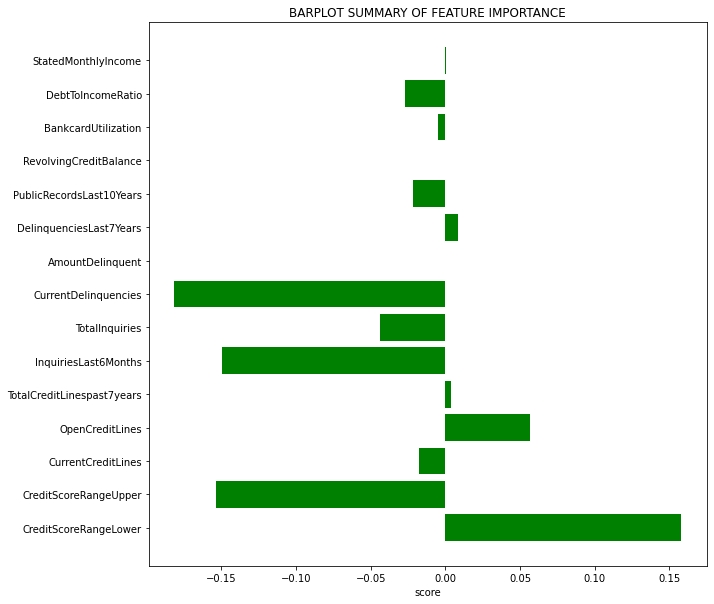

In [7]:
from matplotlib import pyplot

importance = log_model.coef_.flatten()
pyplot.rcParams["figure.figsize"] = (10, 10)
pyplot.barh(prosper_df.columns, importance, color = 'g')
pyplot.title("BARPLOT SUMMARY OF FEATURE IMPORTANCE")
pyplot.xlabel("score")
pyplot.show